In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import root
from scipy.signal import find_peaks


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [63]:
F = 50
gamma = 0.1
I_i = np.linspace(0,40,1000)
delta = np.linspace(0, 1,1000)
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)

I_0_arr = np.linspace(1,40,1000)
R = 0.85
T2_vals = []

for I_0 in I_0_arr:
    T2 = (1-R)/(1+R) * (I_i / I_0)
    T2_vals.append(T2)
    
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)

Let's try and solve this graphically instead


\begin{equation}
T = \frac{1}{1 + F \sin^2(\delta_0 + \gamma I_i)} \tag{1}
\end{equation}

\begin{equation}
T = \frac{(1 - R)}{1 + R } \frac{I_i}{I_o}\tag{2}
\end{equation}

In [64]:
I_0_arr = np.linspace(1,40,1000)
R = 0.85
T2_vals = []

for I_0 in I_0_arr:
    T2 = (1-R)/(1+R) * (I_i / I_0)
    T2_vals.append(T2)
        
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)

In [65]:
I_0_dict_arr = []
for idx, I_0 in enumerate(I_0_arr):
    T2_line = T2_vals[idx]
    peaks, _ = find_peaks(-np.abs(T - T2_vals[idx]))
    filtered_peaks = []
    for peak in peaks:
        if np.abs(T - T2_vals[idx])[peak] < 0.01:
            filtered_peaks.append(peak)
    T_match = T[filtered_peaks]
    I_0_dict_arr.append({"I_0": I_0, "peaks": filtered_peaks, "T_match": T_match})


In [66]:
input_intensities = []
output_intensities = []
for I_0_dict in I_0_dict_arr:
    if len(I_0_dict["peaks"]) > 0:
        T_match = I_0_dict["T_match"]
        for T in T_match:
            input_intensities.append(I_0_dict["I_0"])
            output_intensities.append(T* I_0_dict["I_0"])

Text(0, 0.5, 'Output intensity (a.u)')

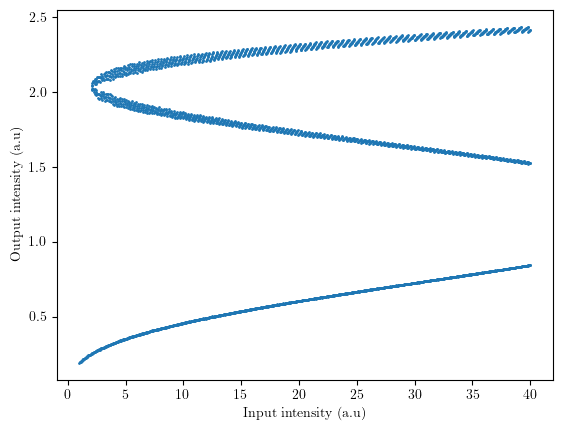

In [67]:
plt.scatter(input_intensities, output_intensities, s=1)
plt.xlabel("Input intensity (a.u)")
plt.ylabel("Output intensity (a.u)")

Let's now try and scan some parameters (fix bug to remove T > 1)

In [82]:
F = 50
GAMMA = 0.1
I_i = np.linspace(0,40,1000)
DELTA = np.linspace(0, 1,1000)

def compute_bistable_curve(finesse, R):
    I_0_arr = np.linspace(1,40,1000)
    R = 0.85
    T2_vals = []

    for I_0 in I_0_arr:
        T2 = (1-R)/(1+R) * (I_i / I_0)
        T2_vals.append(T2)
            
    T = 1 / (1 + finesse * np.sin(delta + gamma * I_i)**2)
    I_0_arr = np.linspace(1,40,1000)

    I_0_dict_arr = []
    for idx, I_0 in enumerate(I_0_arr):
        T2_line = T2_vals[idx]
        peaks, _ = find_peaks(-np.abs(T - T2_vals[idx]))
        filtered_peaks = []
        for peak in peaks:
            if np.abs(T - T2_vals[idx])[peak] < 0.01:
                filtered_peaks.append(peak)
        T_match = T[filtered_peaks]
        I_0_dict_arr.append({"I_0": I_0, "peaks": filtered_peaks, "T_match": T_match})

    input_intensities = []
    output_intensities = []
    for I_0_dict in I_0_dict_arr:
        if len(I_0_dict["peaks"]) > 0:
            T_match = I_0_dict["T_match"]
            for T in T_match:
                input_intensities.append(I_0_dict["I_0"])
                output_intensities.append(T* I_0_dict["I_0"])

    return input_intensities, output_intensities

scan R: low sensitivity to reflectivity and transmission. changing reflectivity will couple onto finesse. I will assume lossless mirrors. 

\begin{equation}
F_c = \frac{2 \pi}{-\ln{R_1 R_2}}
\end{equation}

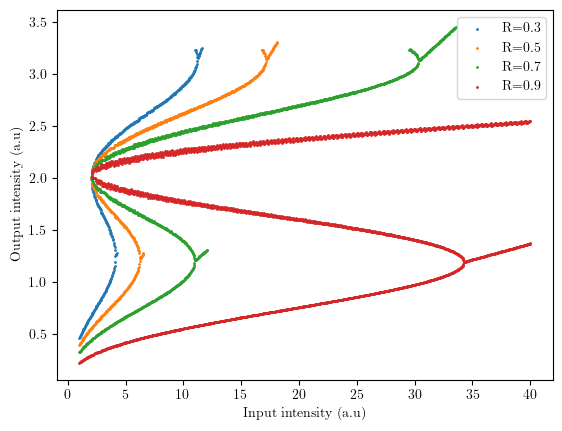

In [84]:
for R in [0.3, 0.5, 0.7, 0.9]:
    finesse = 2 * np.pi / (-np.log(R**2))
    inputs, outputs = compute_bistable_curve(finesse, R)
    plt.scatter(inputs, outputs, s=1, label=f"R={R}")
    plt.xlabel("Input intensity (a.u)")
    plt.ylabel("Output intensity (a.u)")
    plt.legend()

plt.show()

ok great we have some sensitivity